In [1]:
from loader import load_signal
from filtering import apply_filter
from visualization import plot_signal

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
import os

def list_csv_files(filepath):
    # Get the absolute path
    abs_path = os.path.abspath(filepath)
    
    # Initialize an empty list to store CSV file paths
    csv_files = []
    
    # List all files in the folder and filter only CSV files
    try:
        files = [file for file in os.listdir(abs_path) if file.endswith('.csv')]
        for file_name in files:
            full_file_path = os.path.join(abs_path, file_name)
            csv_files.append(full_file_path)
    except FileNotFoundError:
        print(f"The folder {abs_path} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return csv_files

# Store CSV file paths in lists
filepaths_h = list_csv_files('../../ppg_data/High_MWL/')
filepaths_l = list_csv_files('../../ppg_data/Low_MWL/')

In [37]:
filepaths_h

['/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p20h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p16h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p17h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p21h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p6h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p10h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p11h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p12h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p4h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p24h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p8h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p25h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/High_MWL/p5h.csv',
 '/Users/ravirajpurohit/Downloads/Developer/ppg_data/Hi

In [78]:
data = load_signal(filepaths_h[3])

In [122]:
data.columns = ['col1','col2']
data

,col1,col2
0,43.436,31.614
1,43.389,31.592
2,43.332,31.577
3,43.267,31.572
4,43.195,31.581
...,...,...
76795,35.440,34.139
76796,35.421,34.142
76797,35.408,34.145
76798,35.403,34.148


<AxesSubplot:>

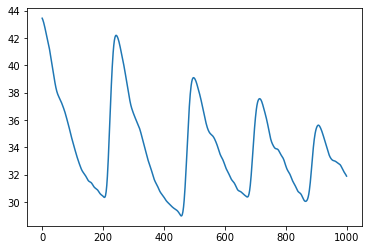

In [123]:
data['col1'][:1000].plot()

In [125]:
data_raw = data['col1']
data_filtered = apply_filter(signal=data_raw, filter_type='lowpass', cutoff=2.5, fs=100, order=1)

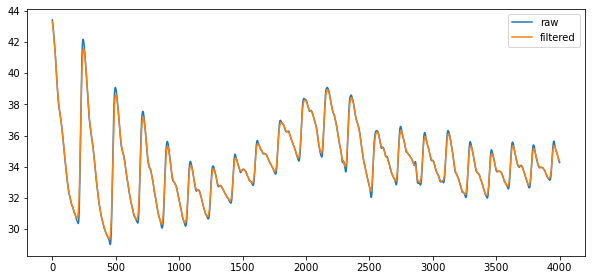

In [127]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(data_raw[:4000])
# plt.subplot(212)
plt.plot(data_filtered[:4000])
plt.legend(['raw','filtered'])

# plt.subplot(212)
# plt.plot(data_filtered)